In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
%matplotlib inline
import matplotlib.pyplot as plt
from google.colab import drive  
from sklearn.impute import KNNImputer

In [ ]:
pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.24.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Using cached numpy-1.20.3-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.4 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 KB 11.2 MB/s eta 0:00:00
  Using cached yellowbrick-1.4-py3-none-any.whl (274 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 271.3/271.3 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.5/269.5 KB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 31.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.0
    Uninstalling numpy-1.19.0:
      Successfully uninstalled numpy-1.19.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
  Attempting 

In [ ]:
!apt-get -qq install -y graphviz && pip install pydot
import pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install cartopy
import cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# FUNCION PARA LEER TODOS LOS ARCHIVOS .LAS DE UNA CARPETA
def leer_archivos_las(path, files):
  
  mneumonics= ['DEPTH', 'FLC', 'FLL', 'CALI', 'MW', 'ROP', 'RDEP', 'RSHA', 'RMED' ,'RXO' ,'SP' ,'DTC' ,'NPHI' ,'PEF' ,'GR' ,'RHOB' ,'DRHO' ,'DEPTH_MD' ,'X_LOC', 'Y_LOC', 'Z_LOC'] 
  
  df_concat=pd.DataFrame()

  for file in files:
    ruta=path+file
    raw_data=open(ruta)
    data=np.loadtxt(raw_data, skiprows=90)
    data = pd.DataFrame(data, columns=mneumonics)
    data= data.drop(columns=['MW','CALI', 'X_LOC', 'Y_LOC', 'Z_LOC', 'DEPTH_MD','DTC','NPHI','PEF','FLC','ROP'])
    data['WELL']=file

    df_concat=pd.concat([df_concat, data])

  return df_concat


#FUNCION PARA IMPUTAR VALORES FALTANTES CON EL ALGORITMO KNN VECINOS.
def imput_by_formation(loglist, df):
  imputer = KNNImputer(n_neighbors=5, weights="uniform")
  for log in loglist:
    imputer.fit(df[[log]])
    df[log] = imputer.transform(df[[log]]).ravel()
  return(df)


#FUNCION PARA IMPUTAR VALORES FALTATES DE TODAS LAS FORMACIONES UTILIZANDO KNN VECINOS 
def filter_by_formation(df):
  list_form = df.FLL.unique().tolist()
  loglist=['RDEP', 'RSHA', 'RMED', 'RXO', 'SP', 'GR', 'RHOB', 'DRHO']
  df_full_imputed = pd.DataFrame()
  for form in list_form:
    print("_________________________________________")
    print("\nInicio de Imputación de "+ form)
    df_filter = df[df.FLL == form]
    df_filter_imputed = imput_by_formation(loglist, df_filter)
    df_full_imputed = pd.concat([df_full_imputed, df_filter_imputed])

    print("Formacion  "+ form + " Imputada")
  
  return(df_full_imputed)

In [ ]:
path=('/content/drive/MyDrive/Force_2020_all_wells_train_test_blind_hidden_final/')
files = ['7_1-1.las','7_1-2 S.las','15_9-13.las','15_9-14.las','15_9-23.las','16_2-11 A.las','16_5-3.las','16_7-4.las','25_2-13 T4.las','25_2-14.las','25_5-1.las','25_5-4.las','25_6-1.las','25_6-3.las','25_10-9.las','31_3-2.las','31_4-5.las','32_2-1.las','33_9-17.las','34_3-1 A.las','34_5-1 S.las']

df_concat=leer_archivos_las(path, files)

In [ ]:
df_concat=df_concat.replace(-999.25, np.nan)

In [ ]:
df_concat

,DEPTH,FLL,RDEP,RSHA,RMED,RXO,SP,GR,RHOB,DRHO,WELL
0,89.1368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7_1-1.las
1,89.2888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7_1-1.las
2,89.4408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7_1-1.las
3,89.5928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7_1-1.las
4,89.7448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7_1-1.las
...,...,...,...,...,...,...,...,...,...,...,...
22921,3902.5140,NaN,NaN,5.970200,2.939163,3.098038,NaN,NaN,NaN,NaN,34_5-1 S.las
22922,3902.6660,NaN,NaN,8.800005,2.974189,3.090110,NaN,NaN,NaN,NaN,34_5-1 S.las
22923,3902.8180,NaN,NaN,13.358212,2.959197,3.077459,NaN,NaN,NaN,NaN,34_5-1 S.las
22924,3902.9700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34_5-1 S.las


<AxesSubplot:>

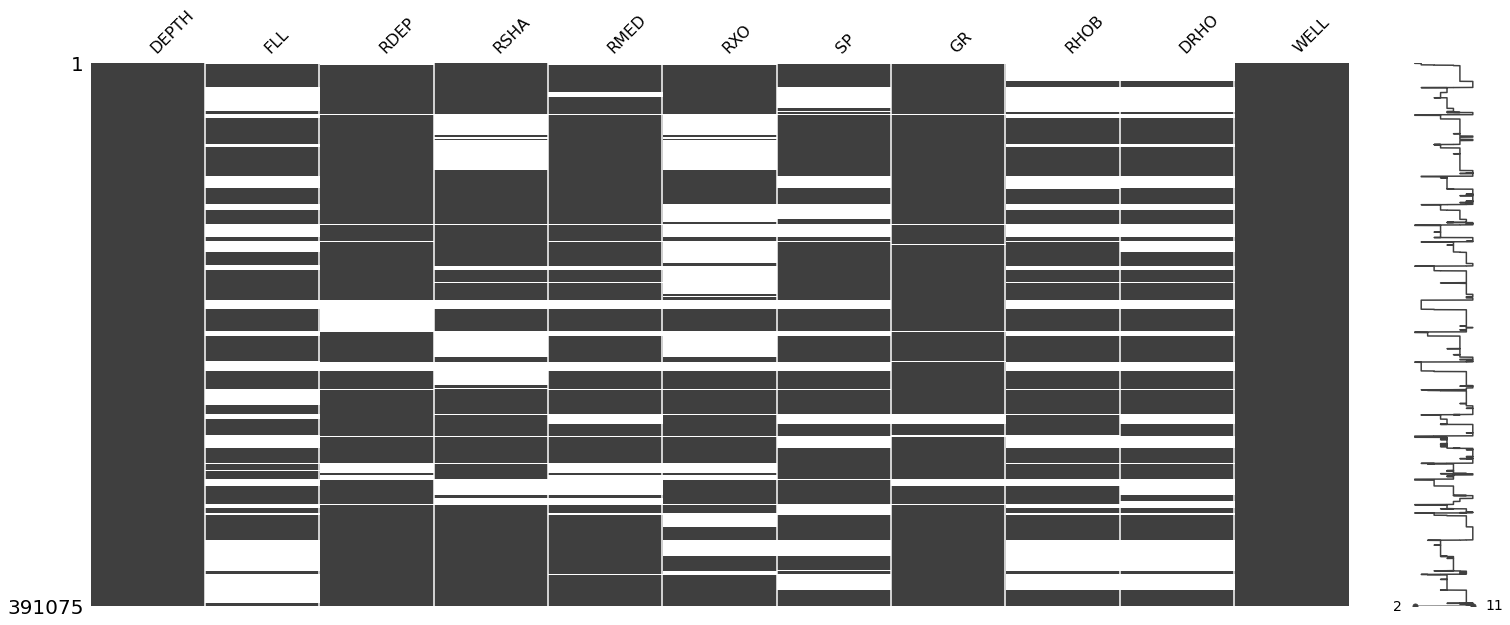

In [ ]:
msno.matrix(df_concat)

In [ ]:
Formaciones_cot = [30000,65030,65000,80000,74000,70000,70032,88000,86000,99000,90000,93000]
Facies= ['Sandstone','Sandstone/Shale','Shale','Marl','Dolomite','Limestone','Chalk','Halite','Anhydrite','Tuff','Coal','Basement']

dic_Facies=dict(zip(Formaciones_cot, Facies))
dic_Facies

{30000: 'Sandstone',
 65030: 'Sandstone/Shale',
 65000: 'Shale',
 80000: 'Marl',
 74000: 'Dolomite',
 70000: 'Limestone',
 70032: 'Chalk',
 88000: 'Halite',
 86000: 'Anhydrite',
 99000: 'Tuff',
 90000: 'Coal',
 93000: 'Basement'}

In [ ]:
df_concat['FLL']=df_concat['FLL'].replace(dic_Facies)
df_concat

,DEPTH,FLL,RDEP,RSHA,RMED,RXO,SP,GR,RHOB,DRHO,WELL
0,89.1368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7_1-1.las
1,89.2888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7_1-1.las
2,89.4408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7_1-1.las
3,89.5928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7_1-1.las
4,89.7448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7_1-1.las
...,...,...,...,...,...,...,...,...,...,...,...
22921,3902.5140,NaN,NaN,5.970200,2.939163,3.098038,NaN,NaN,NaN,NaN,34_5-1 S.las
22922,3902.6660,NaN,NaN,8.800005,2.974189,3.090110,NaN,NaN,NaN,NaN,34_5-1 S.las
22923,3902.8180,NaN,NaN,13.358212,2.959197,3.077459,NaN,NaN,NaN,NaN,34_5-1 S.las
22924,3902.9700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34_5-1 S.las


In [ ]:
df_concat = df_concat[df_concat['FLL'].notna()]
df_concat = df_concat.drop(df_concat[df_concat.FLL=="Anhydrite"].index)
df_concat

,DEPTH,FLL,RDEP,RSHA,RMED,RXO,SP,GR,RHOB,DRHO,WELL
1613,334.3128,Sandstone,NaN,0.173274,NaN,NaN,NaN,21.591261,NaN,NaN,7_1-1.las
1614,334.4648,Sandstone,NaN,0.168177,NaN,NaN,NaN,20.547560,NaN,NaN,7_1-1.las
1615,334.6168,Sandstone,NaN,0.167614,NaN,NaN,NaN,19.865610,NaN,NaN,7_1-1.las
1616,334.7688,Sandstone,NaN,0.167079,NaN,NaN,NaN,19.365442,NaN,NaN,7_1-1.las
1617,334.9208,Sandstone,NaN,0.166517,NaN,NaN,NaN,18.865274,NaN,NaN,7_1-1.las
...,...,...,...,...,...,...,...,...,...,...,...
22892,3898.1060,Sandstone/Shale,7.306917,33.500237,2.582307,2.559894,NaN,64.738617,2.381874,0.009253,34_5-1 S.las
22893,3898.2580,Sandstone/Shale,7.140347,39.182930,2.673776,2.629635,NaN,68.399811,2.368546,0.007026,34_5-1 S.las
22894,3898.4100,Sandstone/Shale,6.973773,38.472721,2.805779,2.707990,NaN,65.552094,2.357109,0.004903,34_5-1 S.las
22895,3898.5620,Sandstone/Shale,6.807139,37.042286,2.918226,2.821661,NaN,58.197449,2.352668,0.003911,34_5-1 S.las


<AxesSubplot:>

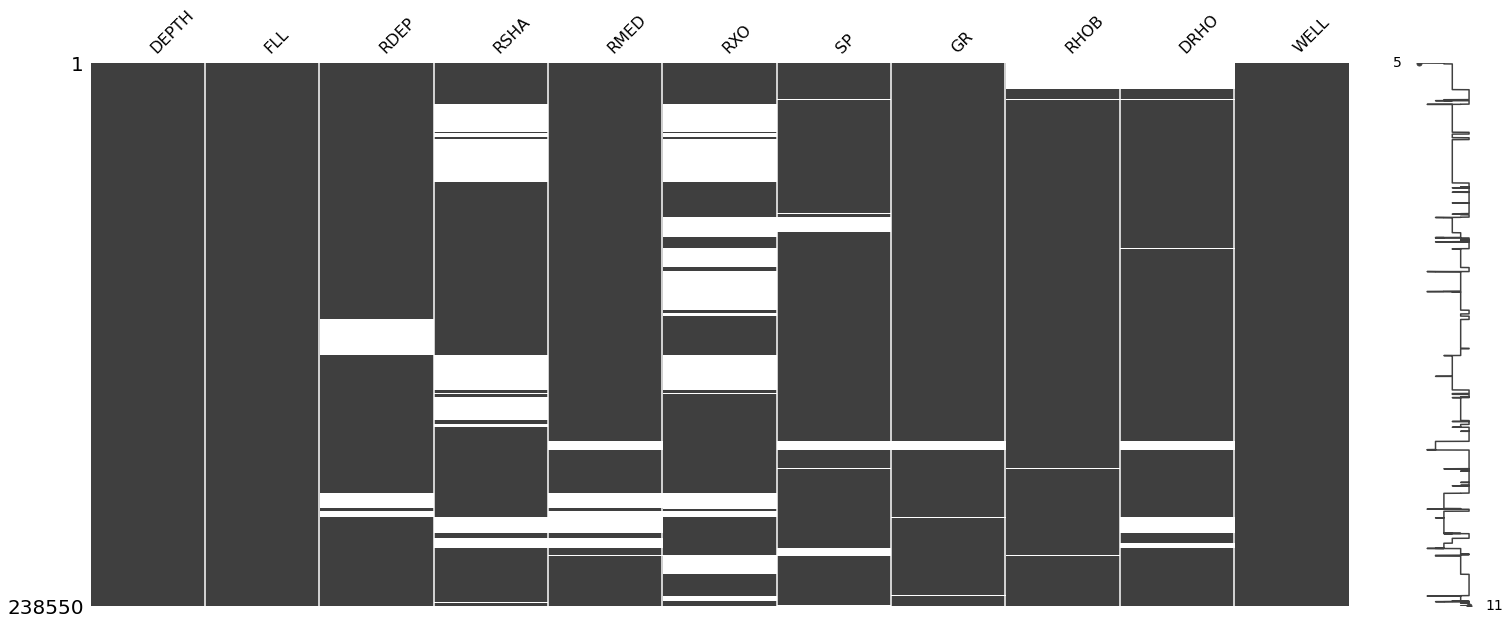

In [ ]:
msno.matrix(df_concat)

In [ ]:
df_final= filter_by_formation(df_concat)

_________________________________________

Inicio de Imputación de Sandstone


<ipython-input-658-3827f9136e94>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[log] = imputer.transform(df[[log]]).ravel()
<ipython-input-658-3827f9136e94>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[log] = imputer.transform(df[[log]]).ravel()
<ipython-input-658-3827f9136e94>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

Formacion  Sandstone Imputada
_________________________________________

Inicio de Imputación de Shale


<ipython-input-658-3827f9136e94>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[log] = imputer.transform(df[[log]]).ravel()
<ipython-input-658-3827f9136e94>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[log] = imputer.transform(df[[log]]).ravel()
<ipython-input-658-3827f9136e94>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

Formacion  Shale Imputada
_________________________________________

Inicio de Imputación de Sandstone/Shale


<ipython-input-658-3827f9136e94>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[log] = imputer.transform(df[[log]]).ravel()
<ipython-input-658-3827f9136e94>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[log] = imputer.transform(df[[log]]).ravel()
<ipython-input-658-3827f9136e94>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

Formacion  Sandstone/Shale Imputada
_________________________________________

Inicio de Imputación de Limestone


<ipython-input-658-3827f9136e94>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[log] = imputer.transform(df[[log]]).ravel()
<ipython-input-658-3827f9136e94>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[log] = imputer.transform(df[[log]]).ravel()
<ipython-input-658-3827f9136e94>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

Formacion  Limestone Imputada
_________________________________________

Inicio de Imputación de Tuff


<ipython-input-658-3827f9136e94>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[log] = imputer.transform(df[[log]]).ravel()
<ipython-input-658-3827f9136e94>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[log] = imputer.transform(df[[log]]).ravel()
<ipython-input-658-3827f9136e94>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

Formacion  Tuff Imputada
_________________________________________

Inicio de Imputación de Marl


<ipython-input-658-3827f9136e94>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[log] = imputer.transform(df[[log]]).ravel()
<ipython-input-658-3827f9136e94>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[log] = imputer.transform(df[[log]]).ravel()
<ipython-input-658-3827f9136e94>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

Formacion  Marl Imputada
_________________________________________

Inicio de Imputación de Chalk
Formacion  Chalk Imputada
_________________________________________

Inicio de Imputación de Dolomite
Formacion  Dolomite Imputada
_________________________________________

Inicio de Imputación de Coal
Formacion  Coal Imputada


<ipython-input-658-3827f9136e94>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[log] = imputer.transform(df[[log]]).ravel()
<ipython-input-658-3827f9136e94>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[log] = imputer.transform(df[[log]]).ravel()
<ipython-input-658-3827f9136e94>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [ ]:
df_concat.FLL.unique()

array(['Sandstone', 'Shale', 'Sandstone/Shale', 'Limestone', 'Tuff',
       'Marl', 'Chalk', 'Dolomite', 'Coal'], dtype=object)

<AxesSubplot:>

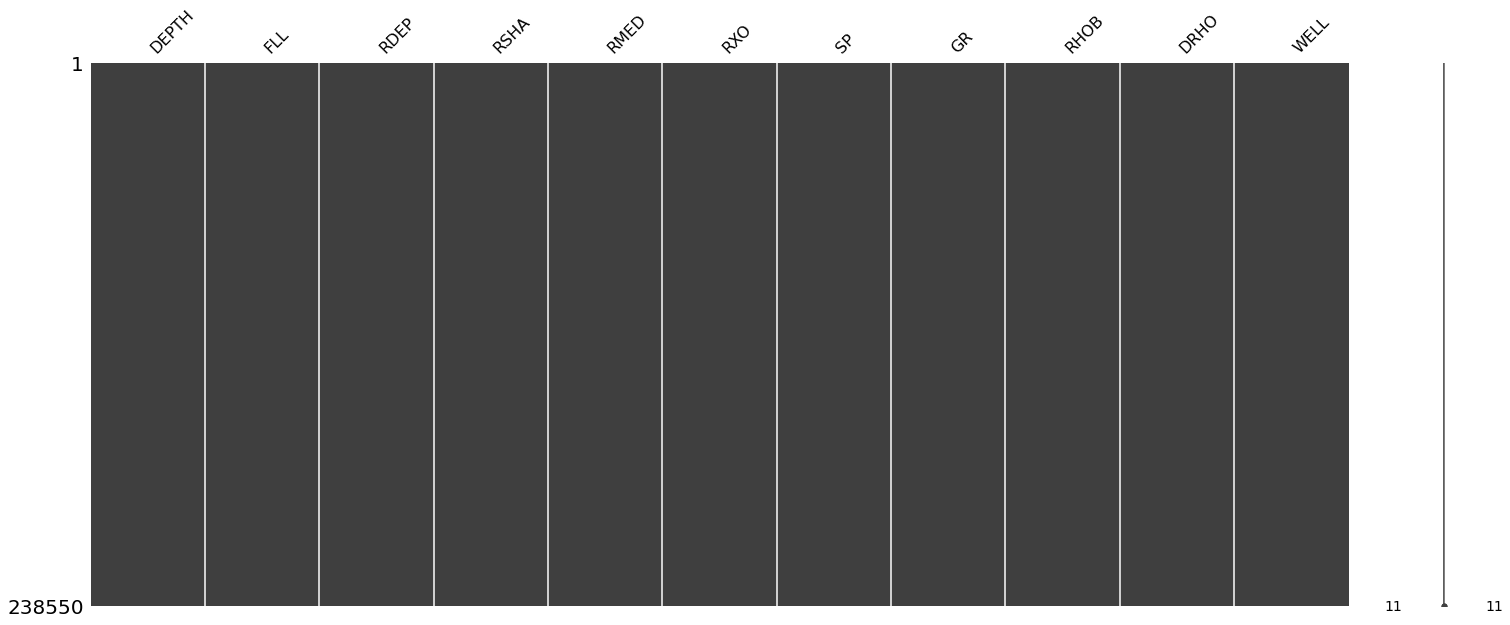

In [ ]:
msno.matrix(df_final)

In [ ]:
df_final.describe()

,DEPTH,RDEP,RSHA,RMED,RXO,SP,GR,RHOB,DRHO
count,238550.000000,238550.000000,238550.000000,238550.000000,238550.000000,238550.000000,238550.000000,238550.000000,238550.000000
mean,1997.690548,13.640914,12.479775,2.642173,-71.256908,85.074476,55.553572,5.813825,1.654289
std,798.531249,33.497908,44.511109,29.082487,224.323147,80.954607,34.679349,16.647308,10.767242
min,334.312800,0.115860,0.000000,0.056584,-999.900024,-108.589333,0.046715,-1.970099,-190.125000
25%,1384.634600,0.921441,1.203652,0.778895,-86.682917,26.688454,34.737745,2.051039,-0.003811
50%,1964.278398,1.866078,3.992766,1.299179,0.422383,71.063261,54.448713,2.251730,0.024879
75%,2585.171000,14.555630,12.911786,2.013018,1.529634,124.105406,74.252243,2.503957,0.078503
max,4146.536715,1978.452515,1672.776977,2000.000000,2000.000000,446.399933,531.937866,154.071289,203.636719


In [ ]:
df_final.columns

Index(['DEPTH', 'FLL', 'RDEP', 'RSHA', 'RMED', 'RXO', 'SP', 'GR', 'RHOB',
       'DRHO', 'WELL'],
      dtype='object')

In [ ]:
print(f'DEPTH: {df_final.DEPTH.nunique()}->{df_final.DEPTH.dtype}')
print(f'FLL: {df_final.FLL.nunique()}->{df_final.FLL.dtype}')
print(f'RDEP: {df_final.RDEP.nunique()}->{df_final.RDEP.dtype}')
print(f'RSHA: {df_final.RSHA.nunique()}->{df_final.RSHA.dtype}')
print(f'RMED: {df_final.RMED.nunique()}->{df_final.RMED.dtype}')
print(f'RXO: {df_final.RXO.nunique()}->{df_final.RXO.dtype}')
print(f'SP: {df_final.SP.nunique()}->{df_final.SP.dtype}')
print(f'GR: {df_final.GR.nunique()}->{df_final.GR.dtype}')
print(f'RHOB: {df_final.RHOB.nunique()}->{df_final.RHOB.dtype}')
print(f'DRHO: {df_final.DRHO.nunique()}->{df_final.DRHO.dtype}')

DEPTH: 238550->float64
FLL: 9->object
RDEP: 175554->float64
RSHA: 164010->float64
RMED: 211228->float64
RXO: 121287->float64
SP: 219450->float64
GR: 233264->float64
RHOB: 217558->float64
DRHO: 207047->float64


In [ ]:
df_final

,DEPTH,FLL,RDEP,RSHA,RMED,RXO,SP,GR,RHOB,DRHO,WELL
1613,334.3128,Sandstone,14.644565,0.173274,4.860347,-58.089448,77.960586,21.591261,3.457717,2.192809,7_1-1.las
1614,334.4648,Sandstone,14.644565,0.168177,4.860347,-58.089448,77.960586,20.547560,3.457717,2.192809,7_1-1.las
1615,334.6168,Sandstone,14.644565,0.167614,4.860347,-58.089448,77.960586,19.865610,3.457717,2.192809,7_1-1.las
1616,334.7688,Sandstone,14.644565,0.167079,4.860347,-58.089448,77.960586,19.365442,3.457717,2.192809,7_1-1.las
1617,334.9208,Sandstone,14.644565,0.166517,4.860347,-58.089448,77.960586,18.865274,3.457717,2.192809,7_1-1.las
...,...,...,...,...,...,...,...,...,...,...,...
22613,3855.6980,Coal,13.694600,12.538705,15.905454,17.240759,117.100662,40.812019,2.596416,-0.020761,34_5-1 S.las
22614,3855.8500,Coal,12.243498,9.702552,15.413486,16.111303,122.015007,38.651119,2.566687,-0.023953,34_5-1 S.las
22615,3856.0020,Coal,11.049426,9.099504,12.590005,12.516881,129.809921,39.710636,2.605924,-0.019256,34_5-1 S.las
22616,3856.1540,Coal,11.218419,12.682650,10.919451,10.514554,136.377594,40.489075,2.643964,-0.029342,34_5-1 S.las


In [ ]:
Formaciones_cot_well = [1, 2, 3, 4, 5, 6, 7,8,9,10,11,12]
Facies_well= ['Sandstone','Sandstone/Shale','Shale','Marl','Dolomite','Limestone','Chalk','Halite','Anhydrite','Tuff','Coal','Basement']

dic_Facies_well=dict(zip( Facies_well, Formaciones_cot_well))
dic_Facies_well

{'Sandstone': 1,
 'Sandstone/Shale': 2,
 'Shale': 3,
 'Marl': 4,
 'Dolomite': 5,
 'Limestone': 6,
 'Chalk': 7,
 'Halite': 8,
 'Anhydrite': 9,
 'Tuff': 10,
 'Coal': 11,
 'Basement': 12}

In [ ]:
df_final['FLL']=df_final['FLL'].replace(dic_Facies_well)
df_final

,DEPTH,FLL,RDEP,RSHA,RMED,RXO,SP,GR,RHOB,DRHO,WELL
1613,334.3128,1,14.644565,0.173274,4.860347,-58.089448,77.960586,21.591261,3.457717,2.192809,7_1-1.las
1614,334.4648,1,14.644565,0.168177,4.860347,-58.089448,77.960586,20.547560,3.457717,2.192809,7_1-1.las
1615,334.6168,1,14.644565,0.167614,4.860347,-58.089448,77.960586,19.865610,3.457717,2.192809,7_1-1.las
1616,334.7688,1,14.644565,0.167079,4.860347,-58.089448,77.960586,19.365442,3.457717,2.192809,7_1-1.las
1617,334.9208,1,14.644565,0.166517,4.860347,-58.089448,77.960586,18.865274,3.457717,2.192809,7_1-1.las
...,...,...,...,...,...,...,...,...,...,...,...
22613,3855.6980,11,13.694600,12.538705,15.905454,17.240759,117.100662,40.812019,2.596416,-0.020761,34_5-1 S.las
22614,3855.8500,11,12.243498,9.702552,15.413486,16.111303,122.015007,38.651119,2.566687,-0.023953,34_5-1 S.las
22615,3856.0020,11,11.049426,9.099504,12.590005,12.516881,129.809921,39.710636,2.605924,-0.019256,34_5-1 S.las
22616,3856.1540,11,11.218419,12.682650,10.919451,10.514554,136.377594,40.489075,2.643964,-0.029342,34_5-1 S.las


In [ ]:
df_final = df_final[df_final['FLL'].notna()]
df_final

,DEPTH,FLL,RDEP,RSHA,RMED,RXO,SP,GR,RHOB,DRHO,WELL
1613,334.3128,1,14.644565,0.173274,4.860347,-58.089448,77.960586,21.591261,3.457717,2.192809,7_1-1.las
1614,334.4648,1,14.644565,0.168177,4.860347,-58.089448,77.960586,20.547560,3.457717,2.192809,7_1-1.las
1615,334.6168,1,14.644565,0.167614,4.860347,-58.089448,77.960586,19.865610,3.457717,2.192809,7_1-1.las
1616,334.7688,1,14.644565,0.167079,4.860347,-58.089448,77.960586,19.365442,3.457717,2.192809,7_1-1.las
1617,334.9208,1,14.644565,0.166517,4.860347,-58.089448,77.960586,18.865274,3.457717,2.192809,7_1-1.las
...,...,...,...,...,...,...,...,...,...,...,...
22613,3855.6980,11,13.694600,12.538705,15.905454,17.240759,117.100662,40.812019,2.596416,-0.020761,34_5-1 S.las
22614,3855.8500,11,12.243498,9.702552,15.413486,16.111303,122.015007,38.651119,2.566687,-0.023953,34_5-1 S.las
22615,3856.0020,11,11.049426,9.099504,12.590005,12.516881,129.809921,39.710636,2.605924,-0.019256,34_5-1 S.las
22616,3856.1540,11,11.218419,12.682650,10.919451,10.514554,136.377594,40.489075,2.643964,-0.029342,34_5-1 S.las


In [ ]:
df_final[df_final.WELL=="15_9-14.las"]

,DEPTH,FLL,RDEP,RSHA,RMED,RXO,SP,GR,RHOB,DRHO,WELL
2590,499.020001,1,1.617369,5.921095,1.451672,-58.089448,36.046021,43.141117,1.829448,-0.004855,15_9-14.las
2591,499.172001,1,1.619861,5.921095,1.447127,-58.089448,35.634991,39.169815,1.833848,-0.003509,15_9-14.las
2592,499.324001,1,1.628227,5.921095,1.445384,-58.089448,35.918831,39.155239,1.843781,0.006345,15_9-14.las
2593,499.476001,1,1.632044,5.921095,1.448445,-58.089448,34.377258,37.622818,1.855849,0.011281,15_9-14.las
2594,499.628001,1,1.635028,5.921095,1.475386,-58.089448,34.551353,39.489899,1.872021,0.011735,15_9-14.las
...,...,...,...,...,...,...,...,...,...,...,...
20841,3273.172001,11,21.852484,2.237804,29.396128,1.747063,37.552025,38.005070,1.487950,-0.033965,15_9-14.las
20842,3273.324001,11,15.630095,2.839325,31.264732,5.920589,35.569309,38.366093,1.496763,-0.029763,15_9-14.las
20843,3273.476001,11,15.903163,10.841199,34.365681,9.288768,34.425434,35.990376,1.511625,-0.021666,15_9-14.las
20844,3273.628001,11,9.694814,5.433808,43.294548,4.090678,36.577229,35.693111,1.561463,-0.011214,15_9-14.las


In [ ]:
df_well_prueba=df_final[df_final.WELL=="15_9-14.las"]

In [ ]:
df_well_prueba

,DEPTH,FLL,RDEP,RSHA,RMED,RXO,SP,GR,RHOB,DRHO,WELL
2590,499.020001,1,1.617369,5.921095,1.451672,-58.089448,36.046021,43.141117,1.829448,-0.004855,15_9-14.las
2591,499.172001,1,1.619861,5.921095,1.447127,-58.089448,35.634991,39.169815,1.833848,-0.003509,15_9-14.las
2592,499.324001,1,1.628227,5.921095,1.445384,-58.089448,35.918831,39.155239,1.843781,0.006345,15_9-14.las
2593,499.476001,1,1.632044,5.921095,1.448445,-58.089448,34.377258,37.622818,1.855849,0.011281,15_9-14.las
2594,499.628001,1,1.635028,5.921095,1.475386,-58.089448,34.551353,39.489899,1.872021,0.011735,15_9-14.las
...,...,...,...,...,...,...,...,...,...,...,...
20841,3273.172001,11,21.852484,2.237804,29.396128,1.747063,37.552025,38.005070,1.487950,-0.033965,15_9-14.las
20842,3273.324001,11,15.630095,2.839325,31.264732,5.920589,35.569309,38.366093,1.496763,-0.029763,15_9-14.las
20843,3273.476001,11,15.903163,10.841199,34.365681,9.288768,34.425434,35.990376,1.511625,-0.021666,15_9-14.las
20844,3273.628001,11,9.694814,5.433808,43.294548,4.090678,36.577229,35.693111,1.561463,-0.011214,15_9-14.las


In [ ]:
df_well_prueba.FLL.unique()

array([ 1,  3,  2,  6, 10,  4,  7, 11])

In [ ]:
f=df_well_prueba.FLL.values

In [ ]:
depth=df_well_prueba.DEPTH.values

In [ ]:
facies=[]

In [ ]:
for i  in range(len(depth)):
  facies.append(f[i])

In [ ]:
df_well_prueba['FLL']=facies

<ipython-input-685-99c64028f588>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_well_prueba['FLL']=facies


In [ ]:
def log_plot(df_well_prueba):
  df_well_prueba= df_well_prueba.sort_values(by='DEPTH')

  rows,cols = 1,9
  fig,ax= plt.subplots(nrows=rows, ncols=cols, figsize=(12,6), sharey=True)
  ax[0].plot(df_well_prueba.RDEP, df_well_prueba.DEPTH, color='black')
  ax[0].set_title('RDEP')
  ax[0].minorticks_on()
  ax[0].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[0].grid(which='minor', linestyle=':',linewidth='0.5', color='black')
  ax[1].plot(df_well_prueba.RSHA, df_well_prueba.DEPTH, color='black')
  ax[1].set_title('RSHA')
  ax[1].minorticks_on()
  ax[1].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[1].grid(which='minor', linestyle=':',linewidth='0.5', color='black')
  ax[2].plot(df_well_prueba.RMED, df_well_prueba.DEPTH, color='black')
  ax[2].set_title('RMED')
  ax[2].minorticks_on()
  ax[2].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[2].grid(which='minor', linestyle=':',linewidth='0.5', color='black')
  ax[3].plot(df_well_prueba.RXO, df_well_prueba.DEPTH, color='black')
  ax[3].set_title('RXO')
  ax[3].minorticks_on()
  ax[3].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[3].grid(which='minor', linestyle=':',linewidth='0.5', color='black')
  ax[4].plot(df_well_prueba.SP, df_well_prueba.DEPTH, color='black')
  ax[4].set_title('SP')
  ax[4].minorticks_on()
  ax[4].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[4].grid(which='minor', linestyle=':',linewidth='0.5', color='black')
  ax[5].plot(df_well_prueba.GR, df_well_prueba.DEPTH, color='black')
  ax[5].set_title('GR')
  ax[5].minorticks_on()
  ax[5].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[5].grid(which='minor', linestyle=':',linewidth='0.5', color='black')
  ax[6].plot(df_well_prueba.RHOB, df_well_prueba.DEPTH, color='black')
  ax[6].set_title('RHOB')
  ax[6].minorticks_on()
  ax[6].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[6].grid(which='minor', linestyle=':',linewidth='0.5', color='black')
  ax[7].plot(df_well_prueba.DRHO, df_well_prueba.DEPTH, color='black')
  ax[7].set_title('DRHO')
  ax[7].minorticks_on()
  ax[7].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[7].grid(which='minor', linestyle=':',linewidth='0.5', color='black')


  for i in range (len(ax)):
    ax[i].set_ylim(max(df_well_prueba.DEPTH), min(df_well_prueba.DEPTH))
 

  F= np.vstack((facies, facies)).T
  ax[8].imshow(F, aspect='auto', extent=[0,1, max(df_well_prueba.DEPTH), min(df_well_prueba.DEPTH)])
  ax[8].set_title('FACIES')


  plt.suptitle('WELL PREDICTION 15_9-14', size=15)

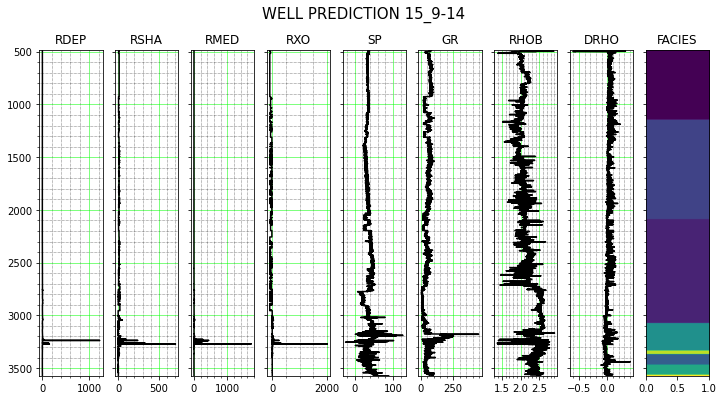

In [ ]:
log_plot(df_well_prueba)

In [ ]:
from scipy.signal import butter 
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import StratifiedKFold, cross_val_score


In [ ]:
X_train = df_well_prueba[['RMED', 'RSHA', 'RMED', 'RXO', 'SP', 'GR', 'RHOB', 'DRHO']]

In [ ]:
y_train = df_well_prueba.FLL

In [ ]:
#GRIDSEARCH BASADO EN HIPERPARAMETROS

In [ ]:
pipe = make_pipeline(StandardScaler(), KNN(n_neighbors=5))

In [ ]:
cv = StratifiedKFold(5, shuffle = True)

In [ ]:
cv_scores=cross_val_score(pipe, X_train, y_train, cv=cv, scoring='accuracy')
mean_cv_scores=np.mean(cv_scores)
print('Accuracy mean from 5-fold CV', mean_cv_scores)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/metaestimators.py:121: FutureWarning: if_delegate_has_method was deprecated in version 1.1 and will be removed in version 1.3. Use available_if instead.
  update_wrapper(out, self.fn)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/metaestimators.py:121: FutureWarning: if_delegate_has_method was deprecated in version 1.1 and will be removed in version 1.3. Use available_if instead.
  update_wrapper(out, self.fn)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/metaestimators.py:121: FutureWarning: if_delegate_has_method was deprecated in version 1.1 and will be removed in version 1.3. Use available_if instead.
  update_wrapper(out, self.fn)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/metaestimators.py:121: FutureWarning: if_delegate_has_method was deprecated in version 1.1 and will be removed in version 1.3. Use available_if instead.
  update_wrapper(out, self.fn)
/usr/local/lib/python3.8/dist-packages/sklearn/utils

Accuracy mean from 5-fold CV 0.9582657664423131


In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
y_pred=pipe.predict(X_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/metaestimators.py:121: FutureWarning: if_delegate_has_method was deprecated in version 1.1 and will be removed in version 1.3. Use available_if instead.
  update_wrapper(out, self.fn)


In [ ]:
y_pred

array([ 1,  1,  1, ..., 11, 11, 11])

In [ ]:
lista_y_pred = y_pred.tolist()

In [ ]:
lista_y_pred

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
df_lista_resultado = pd.DataFrame({'DEPTH': df_well_prueba['DEPTH'], 'FLLPD': lista_y_pred})

In [ ]:
df_lista_resultado

,DEPTH,FLLPD
2590,499.020001,1
2591,499.172001,1
2592,499.324001,1
2593,499.476001,1
2594,499.628001,1
...,...,...
20841,3273.172001,11
20842,3273.324001,11
20843,3273.476001,11
20844,3273.628001,11


In [ ]:
df_resultado = pd.merge(df_well_prueba, df_lista_resultado, on="DEPTH")

In [ ]:
df_resultado

,DEPTH,FLL,RDEP,RSHA,RMED,RXO,SP,GR,RHOB,DRHO,WELL,FLLPD
0,499.020001,1,1.617369,5.921095,1.451672,-58.089448,36.046021,43.141117,1.829448,-0.004855,15_9-14.las,1
1,499.172001,1,1.619861,5.921095,1.447127,-58.089448,35.634991,39.169815,1.833848,-0.003509,15_9-14.las,1
2,499.324001,1,1.628227,5.921095,1.445384,-58.089448,35.918831,39.155239,1.843781,0.006345,15_9-14.las,1
3,499.476001,1,1.632044,5.921095,1.448445,-58.089448,34.377258,37.622818,1.855849,0.011281,15_9-14.las,1
4,499.628001,1,1.635028,5.921095,1.475386,-58.089448,34.551353,39.489899,1.872021,0.011735,15_9-14.las,1
...,...,...,...,...,...,...,...,...,...,...,...,...
20314,3273.172001,11,21.852484,2.237804,29.396128,1.747063,37.552025,38.005070,1.487950,-0.033965,15_9-14.las,11
20315,3273.324001,11,15.630095,2.839325,31.264732,5.920589,35.569309,38.366093,1.496763,-0.029763,15_9-14.las,11
20316,3273.476001,11,15.903163,10.841199,34.365681,9.288768,34.425434,35.990376,1.511625,-0.021666,15_9-14.las,11
20317,3273.628001,11,9.694814,5.433808,43.294548,4.090678,36.577229,35.693111,1.561463,-0.011214,15_9-14.las,11


In [ ]:
#COLUMNA DE DATOS KNN
f=df_resultado.FLL.values

In [ ]:
depth_prediction = df_resultado.DEPTH.values

In [ ]:
facies_prediction=[]

In [ ]:
for i  in range(len(depth)):
  facies_prediction.append(f[i])

In [ ]:
df_resultado['FLL']=facies_prediction

In [ ]:
#COLUMNA DE PREDICCION KNN
f=df_resultado.FLLPD.values

In [ ]:
depth_prediction = df_resultado.DEPTH.values

In [ ]:
facies_prediction_knn=[]

In [ ]:
for i  in range(len(depth)):
  facies_prediction_knn.append(f[i])

In [ ]:
df_resultado['FLLPD']=facies_prediction_knn

In [ ]:
def log_plot(df_resultado):
  df_resultado= df_resultado.sort_values(by='DEPTH')

  rows,cols = 1,10
  fig,ax= plt.subplots(nrows=rows, ncols=cols, figsize=(12,6), sharey=True)
  ax[0].plot(df_resultado.RDEP, df_resultado.DEPTH, color='black')
  ax[0].set_title('RDEP')
  ax[0].minorticks_on()
  ax[0].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[0].grid(which='minor', linestyle=':',linewidth='0.5', color='black')
  ax[1].plot(df_resultado.RSHA, df_resultado.DEPTH, color='black')
  ax[1].set_title('RSHA')
  ax[1].minorticks_on()
  ax[1].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[1].grid(which='minor', linestyle=':',linewidth='0.5', color='black')
  ax[2].plot(df_resultado.RMED, df_resultado.DEPTH, color='black')
  ax[2].set_title('RMED')
  ax[2].minorticks_on()
  ax[2].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[2].grid(which='minor', linestyle=':',linewidth='0.5', color='black')
  ax[3].plot(df_resultado.RXO, df_resultado.DEPTH, color='black')
  ax[3].set_title('RXO')
  ax[3].minorticks_on()
  ax[3].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[3].grid(which='minor', linestyle=':',linewidth='0.5', color='black')
  ax[4].plot(df_resultado.SP, df_resultado.DEPTH, color='black')
  ax[4].set_title('SP')
  ax[4].minorticks_on()
  ax[4].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[4].grid(which='minor', linestyle=':',linewidth='0.5', color='black')
  ax[5].plot(df_resultado.GR, df_resultado.DEPTH, color='black')
  ax[5].set_title('GR')
  ax[5].minorticks_on()
  ax[5].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[5].grid(which='minor', linestyle=':',linewidth='0.5', color='black')
  ax[6].plot(df_resultado.RHOB, df_resultado.DEPTH, color='black')
  ax[6].set_title('RHOB')
  ax[6].minorticks_on()
  ax[6].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[6].grid(which='minor', linestyle=':',linewidth='0.5', color='black')
  ax[7].plot(df_resultado.DRHO, df_resultado.DEPTH, color='black')
  ax[7].set_title('DRHO')
  ax[7].minorticks_on()
  ax[7].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[7].grid(which='minor', linestyle=':',linewidth='0.5', color='black')


  for i in range (len(ax)):
    ax[i].set_ylim(max(df_resultado.DEPTH), min(df_resultado.DEPTH))
 

  F= np.vstack((facies_prediction, facies_prediction)).T
  ax[8].imshow(F, aspect='auto', extent=[0,1, max(df_resultado.DEPTH), min(df_resultado.DEPTH)])
  ax[8].set_title('TRUE')

  F= np.vstack((facies_prediction_knn, facies_prediction_knn)).T
  ax[9].imshow(F, aspect='auto', extent=[0,1, max(df_resultado.DEPTH), min(df_resultado.DEPTH)])
  ax[9].set_title('PRED_FACIES')


  plt.suptitle('WELL TRUE-PREDICTION FACIES 15_9-14 KNN', size=15)

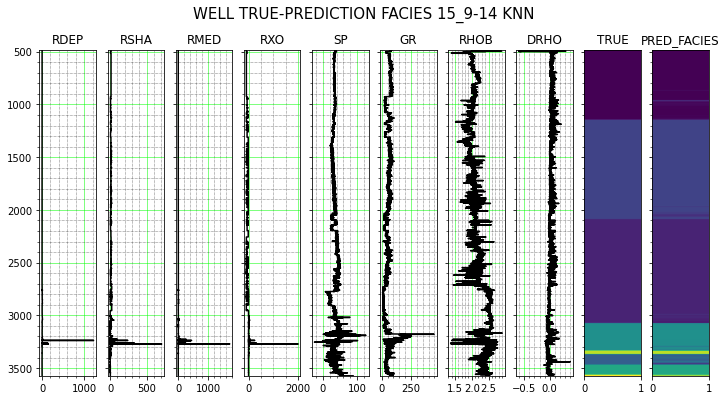

In [ ]:
log_plot(df_resultado)

In [ ]:
df_final[df_final.WELL=="32_2-1.las"]

,DEPTH,FLL,RDEP,RSHA,RMED,RXO,SP,GR,RHOB,DRHO,WELL
3381,899.5156,1,126.680962,2.400744,2.771895,2.482451,77.960586,96.834557,2.459870,0.088906,32_2-1.las
3382,899.6676,1,123.515808,3.112329,3.454691,3.125376,77.960586,94.312065,2.533430,0.081601,32_2-1.las
3383,899.8196,1,114.357727,3.583934,3.691976,3.487117,77.960586,100.000893,2.554765,0.062623,32_2-1.las
3397,901.9476,1,128.110733,8.070553,9.904478,8.249771,77.960586,60.185272,2.585257,0.064946,32_2-1.las
3398,902.0996,1,127.656517,7.563123,9.021699,7.292993,77.960586,52.500900,2.597048,0.062657,32_2-1.las
...,...,...,...,...,...,...,...,...,...,...,...
3784,960.7716,6,74.382599,15.770143,32.797173,18.046116,87.637771,62.593937,2.655434,0.093453,32_2-1.las
3785,960.9236,6,69.804047,13.929691,22.037634,13.939073,87.637771,68.008720,2.643561,0.098355,32_2-1.las
3786,961.0756,6,67.428581,9.975638,9.801691,9.549907,87.637771,74.782639,2.617250,0.086913,32_2-1.las
3787,961.2276,6,63.501762,9.440710,8.771579,9.013060,87.637771,80.478165,2.551467,0.059769,32_2-1.las


In [ ]:
df_well_prueba_tres = df_final[df_final.WELL=="32_2-1.las"]

In [ ]:
df_well_prueba_tres 

,DEPTH,FLL,RDEP,RSHA,RMED,RXO,SP,GR,RHOB,DRHO,WELL
3381,899.5156,1,126.680962,2.400744,2.771895,2.482451,77.960586,96.834557,2.459870,0.088906,32_2-1.las
3382,899.6676,1,123.515808,3.112329,3.454691,3.125376,77.960586,94.312065,2.533430,0.081601,32_2-1.las
3383,899.8196,1,114.357727,3.583934,3.691976,3.487117,77.960586,100.000893,2.554765,0.062623,32_2-1.las
3397,901.9476,1,128.110733,8.070553,9.904478,8.249771,77.960586,60.185272,2.585257,0.064946,32_2-1.las
3398,902.0996,1,127.656517,7.563123,9.021699,7.292993,77.960586,52.500900,2.597048,0.062657,32_2-1.las
...,...,...,...,...,...,...,...,...,...,...,...
3784,960.7716,6,74.382599,15.770143,32.797173,18.046116,87.637771,62.593937,2.655434,0.093453,32_2-1.las
3785,960.9236,6,69.804047,13.929691,22.037634,13.939073,87.637771,68.008720,2.643561,0.098355,32_2-1.las
3786,961.0756,6,67.428581,9.975638,9.801691,9.549907,87.637771,74.782639,2.617250,0.086913,32_2-1.las
3787,961.2276,6,63.501762,9.440710,8.771579,9.013060,87.637771,80.478165,2.551467,0.059769,32_2-1.las


In [ ]:
df_well_prueba_tres.FLL.unique()

array([1, 3, 2, 6])

In [ ]:
f_tres = df_well_prueba_tres.FLL.values

In [ ]:
depth_tres = df_well_prueba_tres.DEPTH.values

In [ ]:
facies_tres=[]

In [ ]:
for i  in range(len(depth_tres)):
  facies_tres.append(f[i])

In [ ]:
df_well_prueba_tres['FLL'] =  facies_tres

<ipython-input-724-f1a98c8a4848>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_well_prueba_tres['FLL'] =  facies_tres


In [ ]:
def log_plot(df_well_prueba_tres):
  df_well_prueba_tres= df_well_prueba_tres.sort_values(by='DEPTH')

  rows,cols = 1,9
  fig,ax= plt.subplots(nrows=rows, ncols=cols, figsize=(12,6), sharey=True)
  ax[0].plot(df_well_prueba_tres.RDEP, df_well_prueba_tres.DEPTH, color='black')
  ax[0].set_title('RDEP')
  ax[0].minorticks_on()
  ax[0].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[0].grid(which='minor', linestyle=':',linewidth='0.5', color='black')
  ax[1].plot(df_well_prueba_tres.RSHA, df_well_prueba_tres.DEPTH, color='black')
  ax[1].set_title('RSHA')
  ax[1].minorticks_on()
  ax[1].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[1].grid(which='minor', linestyle=':',linewidth='0.5', color='black')
  ax[2].plot(df_well_prueba_tres.RMED, df_well_prueba_tres.DEPTH, color='black')
  ax[2].set_title('RMED')
  ax[2].minorticks_on()
  ax[2].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[2].grid(which='minor', linestyle=':',linewidth='0.5', color='black')
  ax[3].plot(df_well_prueba_tres.RXO, df_well_prueba_tres.DEPTH, color='black')
  ax[3].set_title('RXO')
  ax[3].minorticks_on()
  ax[3].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[3].grid(which='minor', linestyle=':',linewidth='0.5', color='black')
  ax[4].plot(df_well_prueba_tres.SP, df_well_prueba_tres.DEPTH, color='black')
  ax[4].set_title('SP')
  ax[4].minorticks_on()
  ax[4].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[4].grid(which='minor', linestyle=':',linewidth='0.5', color='black')
  ax[5].plot(df_well_prueba_tres.GR, df_well_prueba_tres.DEPTH, color='black')
  ax[5].set_title('GR')
  ax[5].minorticks_on()
  ax[5].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[5].grid(which='minor', linestyle=':',linewidth='0.5', color='black')
  ax[6].plot(df_well_prueba_tres.RHOB, df_well_prueba_tres.DEPTH, color='black')
  ax[6].set_title('RHOB')
  ax[6].minorticks_on()
  ax[6].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[6].grid(which='minor', linestyle=':',linewidth='0.5', color='black')
  ax[7].plot(df_well_prueba_tres.DRHO, df_well_prueba_tres.DEPTH, color='black')
  ax[7].set_title('DRHO')
  ax[7].minorticks_on()
  ax[7].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[7].grid(which='minor', linestyle=':',linewidth='0.5', color='black')


  for i in range (len(ax)):
    ax[i].set_ylim(max(df_well_prueba_tres.DEPTH), min(df_well_prueba_tres.DEPTH))
 

  F= np.vstack((facies_tres, facies_tres)).T
  ax[8].imshow(F, aspect='auto', extent=[0,1, max(df_well_prueba_tres.DEPTH), min(df_well_prueba_tres.DEPTH)])
  ax[8].set_title('FACIES')

  

  plt.suptitle('WELL PREDICTION - 32_2-1', size=15)

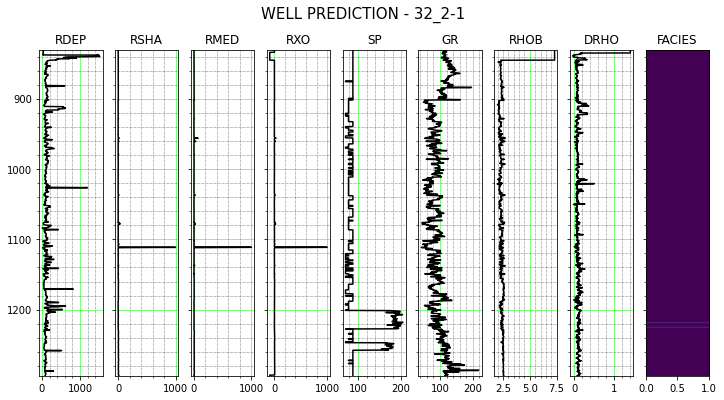

In [ ]:
log_plot(df_well_prueba_tres)

In [ ]:
X_train_tres = df_well_prueba_tres[['RMED', 'RSHA', 'RMED', 'RXO', 'SP', 'GR', 'RHOB', 'DRHO']]

In [ ]:
y_train_tres = df_well_prueba_tres.FLL

In [ ]:
pipe_tres = make_pipeline(StandardScaler(), KNN(n_neighbors=5))

In [ ]:
cv_tres = StratifiedKFold(5, shuffle = True)

In [ ]:
cv_scores_tres = cross_val_score(pipe_tres, X_train_tres, y_train_tres, cv = cv, scoring='accuracy')
mean_cv_scores_tres = np.mean(cv_scores_tres)
print('Accuracy mean from 5-fold CV', mean_cv_scores_tres)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  
/usr/local/lib/python3.8/dist-packages/sklearn/utils/metaestimators.py:121: FutureWarning: if_delegate_has_method was deprecated in version 1.1 and will be removed in version 1.3. Use available_if instead.
  update_wrapper(out, self.fn)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/metaestimators.py:121: FutureWarning: if_delegate_has_method was deprecated in version 1.1 and will be removed in version 1.3. Use available_if instead.
  update_wrapper(out, self.fn)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/metaestimators.py:121: FutureWarning: if_delegate_has_method was deprecated in version 1.1 and will be removed in version 1.3. Use available_if instead.
  update_wrapper(out, self.fn)


Accuracy mean from 5-fold CV 0.999344262295082


/usr/local/lib/python3.8/dist-packages/sklearn/utils/metaestimators.py:121: FutureWarning: if_delegate_has_method was deprecated in version 1.1 and will be removed in version 1.3. Use available_if instead.
  update_wrapper(out, self.fn)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/metaestimators.py:121: FutureWarning: if_delegate_has_method was deprecated in version 1.1 and will be removed in version 1.3. Use available_if instead.
  update_wrapper(out, self.fn)


In [ ]:
pipe.fit(X_train_tres, y_train_tres)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
y_pred=pipe.predict(X_train_tres)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/metaestimators.py:121: FutureWarning: if_delegate_has_method was deprecated in version 1.1 and will be removed in version 1.3. Use available_if instead.
  update_wrapper(out, self.fn)


In [ ]:
lista_y_pred_tres = y_pred.tolist()

In [ ]:
lista_y_pred_tres 

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
df_lista_resultado_tres = pd.DataFrame({'DEPTH': df_well_prueba_tres['DEPTH'], 'FLLPD': lista_y_pred_tres})

In [ ]:
df_lista_resultado_tres 

,DEPTH,FLLPD
3381,899.5156,1
3382,899.6676,1
3383,899.8196,1
3397,901.9476,1
3398,902.0996,1
...,...,...
3784,960.7716,1
3785,960.9236,1
3786,961.0756,1
3787,961.2276,1


In [ ]:
df_resultado_tres = pd.merge(df_well_prueba_tres, df_lista_resultado_tres, on="DEPTH")

In [ ]:
df_resultado_tres 

,DEPTH,FLL,RDEP,RSHA,RMED,RXO,SP,GR,RHOB,DRHO,WELL,FLLPD
0,899.5156,1,126.680962,2.400744,2.771895,2.482451,77.960586,96.834557,2.459870,0.088906,32_2-1.las,1
1,899.6676,1,123.515808,3.112329,3.454691,3.125376,77.960586,94.312065,2.533430,0.081601,32_2-1.las,1
2,899.8196,1,114.357727,3.583934,3.691976,3.487117,77.960586,100.000893,2.554765,0.062623,32_2-1.las,1
3,901.9476,1,128.110733,8.070553,9.904478,8.249771,77.960586,60.185272,2.585257,0.064946,32_2-1.las,1
4,902.0996,1,127.656517,7.563123,9.021699,7.292993,77.960586,52.500900,2.597048,0.062657,32_2-1.las,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3044,960.7716,1,74.382599,15.770143,32.797173,18.046116,87.637771,62.593937,2.655434,0.093453,32_2-1.las,1
3045,960.9236,1,69.804047,13.929691,22.037634,13.939073,87.637771,68.008720,2.643561,0.098355,32_2-1.las,1
3046,961.0756,1,67.428581,9.975638,9.801691,9.549907,87.637771,74.782639,2.617250,0.086913,32_2-1.las,1
3047,961.2276,1,63.501762,9.440710,8.771579,9.013060,87.637771,80.478165,2.551467,0.059769,32_2-1.las,1


In [ ]:
f_tres = df_resultado_tres.FLL.values

In [ ]:
depth_tres = df_resultado_tres.DEPTH.values

In [ ]:
facies_tres=[]

In [ ]:
for i  in range(len(depth_tres)):
  facies_tres.append(f[i])

In [ ]:
df_resultado_tres['FLL'] =  facies_tres

In [ ]:
#IMPLEMENTACION METODO KNN TERCER POZO 

In [ ]:
f_tres = df_resultado_tres.FLLPD.values

In [ ]:
depth_tres = df_resultado_tres.DEPTH.values

In [ ]:
facies_tres_knn=[]

In [ ]:
for i  in range(len(depth_tres)):
  facies_tres_knn.append(f[i])

In [ ]:
df_resultado_tres['FLLPD'] =  facies_tres_knn

In [ ]:
def log_plot(df_resultado_tres):
  df_resultado_tres= df_resultado_tres.sort_values(by='DEPTH')

  rows,cols = 1,10
  fig,ax= plt.subplots(nrows=rows, ncols=cols, figsize=(12,6), sharey=True)
  ax[0].plot(df_resultado_tres.RDEP, df_resultado_tres.DEPTH, color='black')
  ax[0].set_title('RDEP')
  ax[0].minorticks_on()
  ax[0].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[0].grid(which='minor', linestyle=':',linewidth='0.5', color='black')
  ax[1].plot(df_resultado_tres.RSHA, df_resultado_tres.DEPTH, color='black')
  ax[1].set_title('RSHA')
  ax[1].minorticks_on()
  ax[1].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[1].grid(which='minor', linestyle=':',linewidth='0.5', color='black')
  ax[2].plot(df_resultado_tres.RMED, df_resultado_tres.DEPTH, color='black')
  ax[2].set_title('RMED')
  ax[2].minorticks_on()
  ax[2].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[2].grid(which='minor', linestyle=':',linewidth='0.5', color='black')
  ax[3].plot(df_resultado_tres.RXO, df_resultado_tres.DEPTH, color='black')
  ax[3].set_title('RXO')
  ax[3].minorticks_on()
  ax[3].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[3].grid(which='minor', linestyle=':',linewidth='0.5', color='black')
  ax[4].plot(df_resultado_tres.SP, df_resultado_tres.DEPTH, color='black')
  ax[4].set_title('SP')
  ax[4].minorticks_on()
  ax[4].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[4].grid(which='minor', linestyle=':',linewidth='0.5', color='black')
  ax[5].plot(df_resultado_tres.GR, df_resultado_tres.DEPTH, color='black')
  ax[5].set_title('GR')
  ax[5].minorticks_on()
  ax[5].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[5].grid(which='minor', linestyle=':',linewidth='0.5', color='black')
  ax[6].plot(df_resultado_tres.RHOB, df_resultado_tres.DEPTH, color='black')
  ax[6].set_title('RHOB')
  ax[6].minorticks_on()
  ax[6].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[6].grid(which='minor', linestyle=':',linewidth='0.5', color='black')
  ax[7].plot(df_resultado_tres.DRHO, df_resultado_tres.DEPTH, color='black')
  ax[7].set_title('DRHO')
  ax[7].minorticks_on()
  ax[7].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[7].grid(which='minor', linestyle=':',linewidth='0.5', color='black')


  for i in range (len(ax)):
    ax[i].set_ylim(max(df_resultado_tres.DEPTH), min(df_resultado_tres.DEPTH))
 

  F= np.vstack((facies_tres, facies_tres)).T
  ax[8].imshow(F, aspect='auto', extent=[0,1, max(df_resultado_tres.DEPTH), min(df_resultado_tres.DEPTH)])
  ax[8].set_title('TRUE')

  F= np.vstack((facies_tres_knn, facies_tres_knn)).T
  ax[9].imshow(F, aspect='auto', extent=[0,1, max(df_resultado_tres.DEPTH), min(df_resultado_tres.DEPTH)])
  ax[9].set_title('PRED_FACIES')


  plt.suptitle('WELL TRUE-PREDICTION FACIES 32_2-1 KNN', size=15)

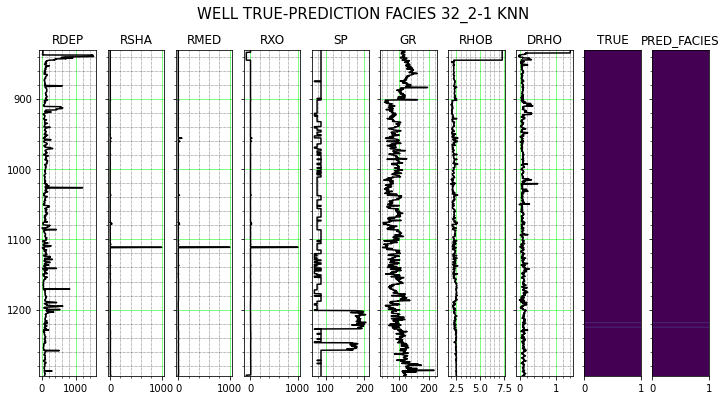

In [ ]:
log_plot(df_resultado_tres)

In [ ]:
df_final[df_final.WELL=="7_1-1.las"]

,DEPTH,FLL,RDEP,RSHA,RMED,RXO,SP,GR,RHOB,DRHO,WELL
1613,334.3128,1,14.644565,0.173274,4.860347,-58.089448,77.960586,21.591261,3.457717,2.192809,7_1-1.las
1614,334.4648,1,14.644565,0.168177,4.860347,-58.089448,77.960586,20.547560,3.457717,2.192809,7_1-1.las
1615,334.6168,1,14.644565,0.167614,4.860347,-58.089448,77.960586,19.865610,3.457717,2.192809,7_1-1.las
1616,334.7688,1,14.644565,0.167079,4.860347,-58.089448,77.960586,19.365442,3.457717,2.192809,7_1-1.las
1617,334.9208,1,14.644565,0.166517,4.860347,-58.089448,77.960586,18.865274,3.457717,2.192809,7_1-1.las
...,...,...,...,...,...,...,...,...,...,...,...
16739,2633.4648,7,1.485847,2.983931,2.098770,1.550751,1.566341,18.589136,2.521262,0.060668,7_1-1.las
16740,2633.6168,7,1.485847,2.981785,2.028170,1.543472,1.555910,18.876398,2.518416,0.051366,7_1-1.las
16741,2633.7688,7,1.485847,2.980139,1.923456,1.514626,1.525191,18.836269,2.506910,0.036320,7_1-1.las
16742,2633.9208,7,1.485847,2.977999,1.817457,1.484797,1.487852,18.781704,2.495149,0.021055,7_1-1.las


In [ ]:
df_well_prueba_cuarto = df_final[df_final.WELL=="7_1-1.las"]

In [ ]:
df_well_prueba_cuarto

,DEPTH,FLL,RDEP,RSHA,RMED,RXO,SP,GR,RHOB,DRHO,WELL
1613,334.3128,1,14.644565,0.173274,4.860347,-58.089448,77.960586,21.591261,3.457717,2.192809,7_1-1.las
1614,334.4648,1,14.644565,0.168177,4.860347,-58.089448,77.960586,20.547560,3.457717,2.192809,7_1-1.las
1615,334.6168,1,14.644565,0.167614,4.860347,-58.089448,77.960586,19.865610,3.457717,2.192809,7_1-1.las
1616,334.7688,1,14.644565,0.167079,4.860347,-58.089448,77.960586,19.365442,3.457717,2.192809,7_1-1.las
1617,334.9208,1,14.644565,0.166517,4.860347,-58.089448,77.960586,18.865274,3.457717,2.192809,7_1-1.las
...,...,...,...,...,...,...,...,...,...,...,...
16739,2633.4648,7,1.485847,2.983931,2.098770,1.550751,1.566341,18.589136,2.521262,0.060668,7_1-1.las
16740,2633.6168,7,1.485847,2.981785,2.028170,1.543472,1.555910,18.876398,2.518416,0.051366,7_1-1.las
16741,2633.7688,7,1.485847,2.980139,1.923456,1.514626,1.525191,18.836269,2.506910,0.036320,7_1-1.las
16742,2633.9208,7,1.485847,2.977999,1.817457,1.484797,1.487852,18.781704,2.495149,0.021055,7_1-1.las


In [ ]:
df_well_prueba_cuarto.FLL.unique()

array([ 1,  3,  2,  6, 10,  4,  7])

In [ ]:
f_cuarto = df_well_prueba_cuarto.FLL.values

In [ ]:
depth_cuarto = df_well_prueba_cuarto.DEPTH.values

In [ ]:
facies_cuarto = []

In [ ]:
for i in range(len(depth_cuarto)):
  facies_cuarto.append(f[i])

In [ ]:
df_well_prueba_cuarto['FLL'] = facies_cuarto

<ipython-input-761-33b4eaed4e65>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_well_prueba_cuarto['FLL'] = facies_cuarto


In [ ]:
def log_plot(df_well_prueba_cuarto):
  df_well_prueba_cuarto= df_well_prueba_cuarto.sort_values(by='DEPTH')

  rows,cols = 1,9
  fig,ax= plt.subplots(nrows=rows, ncols=cols, figsize=(12,6), sharey=True)
  ax[0].plot(df_well_prueba_cuarto.RDEP, df_well_prueba_cuarto.DEPTH, color='black')
  ax[0].set_title('RDEP')
  ax[0].minorticks_on()
  ax[0].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[0].grid(which='minor', linestyle=':',linewidth='0.5', color='black')
  ax[1].plot(df_well_prueba_cuarto.RSHA, df_well_prueba_cuarto.DEPTH, color='black')
  ax[1].set_title('RSHA')
  ax[1].minorticks_on()
  ax[1].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[1].grid(which='minor', linestyle=':',linewidth='0.5', color='black')
  ax[2].plot(df_well_prueba_cuarto.RMED, df_well_prueba_cuarto.DEPTH, color='black')
  ax[2].set_title('RMED')
  ax[2].minorticks_on()
  ax[2].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[2].grid(which='minor', linestyle=':',linewidth='0.5', color='black')
  ax[3].plot(df_well_prueba_cuarto.RXO, df_well_prueba_cuarto.DEPTH, color='black')
  ax[3].set_title('RXO')
  ax[3].minorticks_on()
  ax[3].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[3].grid(which='minor', linestyle=':',linewidth='0.5', color='black')
  ax[4].plot(df_well_prueba_cuarto.SP, df_well_prueba_cuarto.DEPTH, color='black')
  ax[4].set_title('SP')
  ax[4].minorticks_on()
  ax[4].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[4].grid(which='minor', linestyle=':',linewidth='0.5', color='black')
  ax[5].plot(df_well_prueba_cuarto.GR, df_well_prueba_cuarto.DEPTH, color='black')
  ax[5].set_title('GR')
  ax[5].minorticks_on()
  ax[5].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[5].grid(which='minor', linestyle=':',linewidth='0.5', color='black')
  ax[6].plot(df_well_prueba_cuarto.RHOB, df_well_prueba_cuarto.DEPTH, color='black')
  ax[6].set_title('RHOB')
  ax[6].minorticks_on()
  ax[6].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[6].grid(which='minor', linestyle=':',linewidth='0.5', color='black')
  ax[7].plot(df_well_prueba_cuarto.DRHO, df_well_prueba_cuarto.DEPTH, color='black')
  ax[7].set_title('DRHO')
  ax[7].minorticks_on()
  ax[7].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[7].grid(which='minor', linestyle=':',linewidth='0.5', color='black')


  for i in range (len(ax)):
    ax[i].set_ylim(max(df_well_prueba_cuarto.DEPTH), min(df_well_prueba_cuarto.DEPTH))
 

  F= np.vstack((facies_cuarto, facies_cuarto)).T
  ax[8].imshow(F, aspect='auto', extent=[0,1, max(df_well_prueba_cuarto.DEPTH), min(df_well_prueba_cuarto.DEPTH)])
  ax[8].set_title('FACIES')

  

  plt.suptitle('WELL PREDICTION - 7_1-1', size=15)

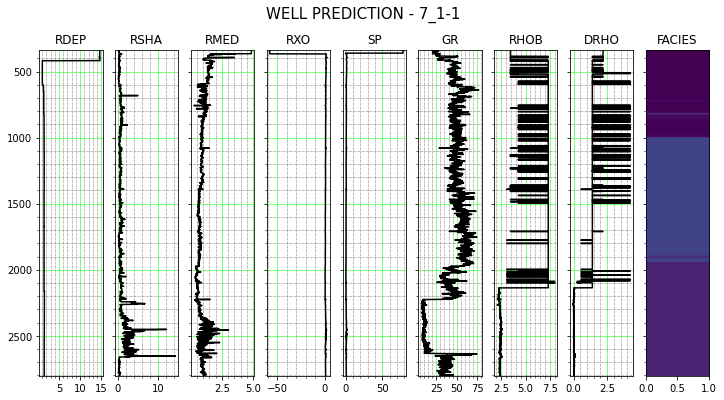

In [ ]:
log_plot(df_well_prueba_cuarto)

In [ ]:
X_train_cuarto = df_well_prueba_cuarto[['RMED', 'RSHA', 'RMED', 'RXO', 'SP', 'GR', 'RHOB', 'DRHO']]

In [ ]:
y_train_cuarto = df_well_prueba_cuarto.FLL

In [ ]:
pipe_cuarto = make_pipeline(StandardScaler(), KNN(n_neighbors=5))

In [ ]:
cv_cuarto = StratifiedKFold(5, shuffle = True)
cv_scores_cuarto = cross_val_score(pipe_cuarto, X_train_cuarto, y_train_cuarto, cv = cv, scoring='accuracy')
mean_cv_scores_cuarto = np.mean(cv_scores_cuarto)
print('Accuracy mean from 5-fold CV', mean_cv_scores_cuarto)
pipe.fit(X_train_cuarto, y_train_cuarto)
y_pred=pipe.predict(X_train_cuarto)
lista_y_pred_cuarto = y_pred.tolist()

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  
/usr/local/lib/python3.8/dist-packages/sklearn/utils/metaestimators.py:121: FutureWarning: if_delegate_has_method was deprecated in version 1.1 and will be removed in version 1.3. Use available_if instead.
  update_wrapper(out, self.fn)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/metaestimators.py:121: FutureWarning: if_delegate_has_method was deprecated in version 1.1 and will be removed in version 1.3. Use available_if instead.
  update_wrapper(out, self.fn)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/metaestimators.py:121: FutureWarning: if_delegate_has_method was deprecated in version 1.1 and will be removed in version 1.3. Use available_if instead.
  update_wrapper(out, self.fn)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/metaestimators.py:121: FutureWarning: if_delegate_has_method

Accuracy mean from 5-fold CV 0.929688274679439


In [ ]:
df_lista_resultado_cuarto = pd.DataFrame({'DEPTH': df_well_prueba_cuarto['DEPTH'], 'FLLPD': lista_y_pred_cuarto})

In [ ]:
df_lista_resultado_cuarto 

,DEPTH,FLLPD
1613,334.3128,1
1614,334.4648,1
1615,334.6168,1
1616,334.7688,1
1617,334.9208,1
...,...,...
16739,2633.4648,2
16740,2633.6168,2
16741,2633.7688,2
16742,2633.9208,2


In [ ]:
df_resultado_cuarto = pd.merge(df_well_prueba_cuarto, df_lista_resultado_cuarto, on="DEPTH")

In [ ]:
df_resultado_cuarto

,DEPTH,FLL,RDEP,RSHA,RMED,RXO,SP,GR,RHOB,DRHO,WELL,FLLPD
0,334.3128,1,14.644565,0.173274,4.860347,-58.089448,77.960586,21.591261,3.457717,2.192809,7_1-1.las,1
1,334.4648,1,14.644565,0.168177,4.860347,-58.089448,77.960586,20.547560,3.457717,2.192809,7_1-1.las,1
2,334.6168,1,14.644565,0.167614,4.860347,-58.089448,77.960586,19.865610,3.457717,2.192809,7_1-1.las,1
3,334.7688,1,14.644565,0.167079,4.860347,-58.089448,77.960586,19.365442,3.457717,2.192809,7_1-1.las,1
4,334.9208,1,14.644565,0.166517,4.860347,-58.089448,77.960586,18.865274,3.457717,2.192809,7_1-1.las,1
...,...,...,...,...,...,...,...,...,...,...,...,...
16237,2633.4648,2,1.485847,2.983931,2.098770,1.550751,1.566341,18.589136,2.521262,0.060668,7_1-1.las,2
16238,2633.6168,2,1.485847,2.981785,2.028170,1.543472,1.555910,18.876398,2.518416,0.051366,7_1-1.las,2
16239,2633.7688,2,1.485847,2.980139,1.923456,1.514626,1.525191,18.836269,2.506910,0.036320,7_1-1.las,2
16240,2633.9208,2,1.485847,2.977999,1.817457,1.484797,1.487852,18.781704,2.495149,0.021055,7_1-1.las,2


In [ ]:
f_cuarto = df_resultado_cuarto.FLL.values

In [ ]:
depth_cuarto = df_resultado_cuarto.DEPTH.values

In [ ]:
facies_cuarto = []

In [ ]:
for i in range (len(depth_cuarto)):
  facies_cuarto.append(f[i])

In [ ]:
df_resultado_cuarto['FLL'] = facies_cuarto

In [ ]:
#knn para tercer pozo

In [ ]:
f_cuarto= df_resultado_cuarto.FLLPD.values

In [ ]:
depth_cuarto = df_resultado_cuarto.DEPTH.values

In [ ]:
facies_cuarto_knn = []

In [ ]:
for i in range (len(depth_cuarto)):
  facies_cuarto_knn.append(f_cuarto[i])

In [ ]:
df_resultado_cuarto['FLLPD'] = facies_cuarto_knn

In [ ]:
def log_plot(df_resultado_cuarto):
  df_resultado_cuarto= df_resultado_cuarto.sort_values(by='DEPTH')

  rows,cols = 1,10
  fig,ax= plt.subplots(nrows=rows, ncols=cols, figsize=(12,6), sharey=True)
  ax[0].plot(df_resultado_cuarto.RDEP, df_resultado_cuarto.DEPTH, color='black')
  ax[0].set_title('RDEP')
  ax[0].minorticks_on()
  ax[0].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[0].grid(which='minor', linestyle=':',linewidth='0.5', color='black')
  ax[1].plot(df_resultado_cuarto.RSHA, df_resultado_cuarto.DEPTH, color='black')
  ax[1].set_title('RSHA')
  ax[1].minorticks_on()
  ax[1].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[1].grid(which='minor', linestyle=':',linewidth='0.5', color='black')
  ax[2].plot(df_resultado_cuarto.RMED, df_resultado_cuarto.DEPTH, color='black')
  ax[2].set_title('RMED')
  ax[2].minorticks_on()
  ax[2].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[2].grid(which='minor', linestyle=':',linewidth='0.5', color='black')
  ax[3].plot(df_resultado_cuarto.RXO, df_resultado_cuarto.DEPTH, color='black')
  ax[3].set_title('RXO')
  ax[3].minorticks_on()
  ax[3].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[3].grid(which='minor', linestyle=':',linewidth='0.5', color='black')
  ax[4].plot(df_resultado_cuarto.SP, df_resultado_cuarto.DEPTH, color='black')
  ax[4].set_title('SP')
  ax[4].minorticks_on()
  ax[4].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[4].grid(which='minor', linestyle=':',linewidth='0.5', color='black')
  ax[5].plot(df_resultado_cuarto.GR, df_resultado_cuarto.DEPTH, color='black')
  ax[5].set_title('GR')
  ax[5].minorticks_on()
  ax[5].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[5].grid(which='minor', linestyle=':',linewidth='0.5', color='black')
  ax[6].plot(df_resultado_cuarto.RHOB, df_resultado_cuarto.DEPTH, color='black')
  ax[6].set_title('RHOB')
  ax[6].minorticks_on()
  ax[6].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[6].grid(which='minor', linestyle=':',linewidth='0.5', color='black')
  ax[7].plot(df_resultado_cuarto.DRHO, df_resultado_cuarto.DEPTH, color='black')
  ax[7].set_title('DRHO')
  ax[7].minorticks_on()
  ax[7].grid(which='major', linestyle='-',linewidth='0.5', color='lime')
  ax[7].grid(which='minor', linestyle=':',linewidth='0.5', color='black')


  for i in range (len(ax)):
    ax[i].set_ylim(max(df_resultado_cuarto.DEPTH), min(df_resultado_cuarto.DEPTH))
 

  F= np.vstack((facies_cuarto, facies_cuarto)).T
  ax[8].imshow(F, aspect='auto', extent=[0,1, max(df_resultado_cuarto.DEPTH), min(df_resultado_cuarto.DEPTH)])
  ax[8].set_title('TRUE')

  F= np.vstack((facies_cuarto_knn, facies_cuarto_knn)).T
  ax[9].imshow(F, aspect='auto', extent=[0,1, max(df_resultado_cuarto.DEPTH), min(df_resultado_cuarto.DEPTH)])
  ax[9].set_title('PRED_FACIES')


  plt.suptitle('WELL TRUE-PREDICTION FACIES 7_1-1 KNN', size=15)

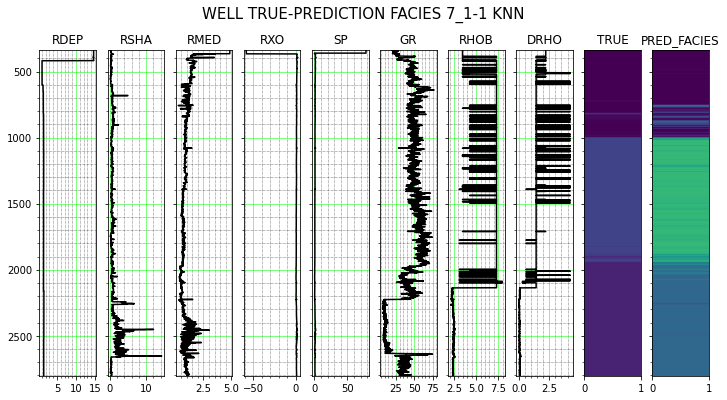

In [ ]:
log_plot(df_resultado_cuarto)

In [ ]:
df1 = df_final[df_final.WELL=="15_9-14.las"]
df2 = df_final[df_final.WELL=="15_9-14.las"]
df3 = df_final[df_final.WELL=="15_9-14.las"]
df4 = df_final[df_final.WELL=="15_9-14.las"]
df_pozos_pycaret = pd.concat([df1, df2, df3, df4], axis=0)
df_pozos_pycaret

,DEPTH,FLL,RDEP,RSHA,RMED,RXO,SP,GR,RHOB,DRHO,WELL
2590,499.020001,1,1.617369,5.921095,1.451672,-58.089448,36.046021,43.141117,1.829448,-0.004855,15_9-14.las
2591,499.172001,1,1.619861,5.921095,1.447127,-58.089448,35.634991,39.169815,1.833848,-0.003509,15_9-14.las
2592,499.324001,1,1.628227,5.921095,1.445384,-58.089448,35.918831,39.155239,1.843781,0.006345,15_9-14.las
2593,499.476001,1,1.632044,5.921095,1.448445,-58.089448,34.377258,37.622818,1.855849,0.011281,15_9-14.las
2594,499.628001,1,1.635028,5.921095,1.475386,-58.089448,34.551353,39.489899,1.872021,0.011735,15_9-14.las
...,...,...,...,...,...,...,...,...,...,...,...
20841,3273.172001,11,21.852484,2.237804,29.396128,1.747063,37.552025,38.005070,1.487950,-0.033965,15_9-14.las
20842,3273.324001,11,15.630095,2.839325,31.264732,5.920589,35.569309,38.366093,1.496763,-0.029763,15_9-14.las
20843,3273.476001,11,15.903163,10.841199,34.365681,9.288768,34.425434,35.990376,1.511625,-0.021666,15_9-14.las
20844,3273.628001,11,9.694814,5.433808,43.294548,4.090678,36.577229,35.693111,1.561463,-0.011214,15_9-14.las


In [ ]:
data = df_pozos_pycaret

In [ ]:
pip uninstall scikit-learn==1.2.1 

Found existing installation: scikit-learn 0.23.2
Uninstalling scikit-learn-0.23.2:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/scikit_learn-0.23.2.dist-info/*
    /usr/local/lib/python3.8/dist-packages/scikit_learn.libs/libgomp-3300acd3.so.1.0.0
    /usr/local/lib/python3.8/dist-packages/sklearn/*
Proceed (Y/n)? Y
  Successfully uninstalled scikit-learn-0.23.2


In [ ]:
pip install scikit-learn==0.23.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-0.23.2-cp38-cp38-manylinux1_x86_64.whl (6.8 MB)


In [ ]:
from pycaret.classification import*

ImportError: ignored

In [ ]:
model_setup=setup(data = data, target = 'FLL', session_id=123)

In [ ]:
best_model= compare_models()

In [ ]:
print (best_model)

In [ ]:
models()

In [ ]:
# Probando diferentes modelos

In [ ]:
knn = create_model('knn')

In [ ]:
ada= create_model('ada')

In [ ]:
gbc= create_model('gbc')

In [ ]:
rf=create_model('rf')

In [ ]:
qda=create_model('qda')

In [ ]:
tuned_knn =tune_model(knn)

In [ ]:
print(tuned_knn)

In [ ]:
#afinar modelo
tuned_rf=tune_model(rf)

In [ ]:
print(tuned_rf)

In [ ]:
#TUNEAR ADA
tuned_ada=tune_model(ada)

In [ ]:
print(tuned_ada)

In [ ]:
#AFINAR QDA
tuned_qda=tune_model(qda)

In [ ]:
print(tuned_qda)

In [ ]:
#AFINAR GBC
tuned_gbc=tune_model(gbc)

In [ ]:
print(tuned_gbc)

In [ ]:
from pycaret.internal.tabular import tune_model_unsupervised
plot_model(tuned_knn, plot='auc')

In [ ]:
from pycaret.internal.tabular import tune_model_unsupervised
#GRAFICA AUC
plot_model(tuned_rf, plot ='auc')

In [ ]:
plot_model(tuned_ada, plot ='auc')

In [ ]:
plot_model(tuned_qda, plot ='auc')

In [ ]:
plot_model(tuned_gbc, plot ='auc')

In [ ]:
#PRECISION
plot_model(tuned_knn, plot='pr')

In [ ]:
#PRECISION
plot_model(tuned_rf, plot='pr')

In [ ]:
plot_model(tuned_ada, plot='pr')

In [ ]:
plot_model(tuned_qda, plot='pr')

In [ ]:
plot_model(tuned_gbc, plot='pr')

In [ ]:
plot_model(tuned_knn, plot='feature')

In [ ]:
#FEATURE IMPORTANCE
plot_model(tuned_rf, plot='feature')

In [ ]:
plot_model(tuned_ada, plot='feature')

In [ ]:
plot_model(tuned_qda, plot='feature')

In [ ]:
plot_model(tuned_gbc, plot='feature')

In [ ]:
#MATRIX DE CONFUSION 
plot_model(tuned_rf, plot='confusion_matrix')

In [ ]:
# MATRIX DE CONFUSION 
plot_model(tuned_knn, plot='confusion_matrix')

In [ ]:
plot_model(tuned_ada, plot='confusion_matrix')

In [ ]:
plot_model(tuned_qda, plot='confusion_matrix')

In [ ]:
plot_model(tuned_gbc, plot='confusion_matrix')

In [ ]:
evaluate_model(tuned_knn)

In [ ]:
#EVALUAR EL MODELO
evaluate_model(tuned_rf)

In [ ]:
evaluate_model(tuned_ada)

In [ ]:
evaluate_model(tuned_qda)

In [ ]:
evaluate_model(tuned_gbc)

In [ ]:
final_knn=finalize_model(tuned_knn)

In [ ]:
#FINALIZAR EL MODELO 
final_rf=finalize_model(tuned_rf)

In [ ]:
final_ada=finalize_model(tuned_ada)

In [ ]:
final_qda=finalize_model(tuned_qda)

In [ ]:
final_gbc=finalize_model(tuned_gbc)